In [1]:
import pathlib
pathlib.Path()

PosixPath('.')

In [3]:
path = pathlib.Path()
path = path.resolve()

In [4]:
path.exists()

True

In [5]:
path.is_dir()

True

In [6]:
# path.rename("new name")

# path.unlink()  # delete if path is a file
# path.rmdir()  # delete if path is a directory

In [7]:
data_directory = path / "data"
data_directory

PosixPath('/Users/shuaiyizhang/Develop/AutoGIS/data')

In [8]:
data_directory.exists()

False

In [9]:
data_directory.mkdir()

In [11]:
data_directory.parent == path

True

In [12]:
NOTEBOOK_PATH = pathlib.Path().resolve() # All uppercase = constant var
DATA_DIRECTORY = NOTEBOOK_PATH / "data"


In [14]:
DATA_DIRECTORY

PosixPath('/Users/shuaiyizhang/Develop/AutoGIS/data')

## File formates - Vector data I/O

In [16]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [17]:
import geopandas
municipalities = geopandas.read_file(
    DATA_DIRECTORY / "finland_municipalities" / "finland_municipalities_2021.gpkg"
)
municipalities.head()

,GML_ID,NATCODE,NAMEFIN,NAMESWE,LANDAREA,FRESHWAREA,SEAWAREA,TOTALAREA,geometry
0,1601000258,498,Muonio,Muonio,1904.05,133.73,0.0,2037.78,"POLYGON ((366703.026 7563861.713, 373641.706 7..."
1,1601000566,148,Inari,Enare,15056.29,2277.33,0.0,17333.62,"POLYGON ((554063.014 7746246.426, 558386.737 7..."
2,1601000428,224,Karkkila,Högfors,242.35,12.97,0.0,255.32,"POLYGON ((338515.195 6726577.401, 338539.595 6..."
3,1601000698,271,Kokemäki,Kumo,480.20,51.06,0.0,531.26,"POLYGON ((260519.503 6818726.479, 263236.792 6..."
4,1601000343,176,Juuka,Juuka,1501.70,344.87,0.0,1846.57,"POLYGON ((607203.808 7035838.978, 608878.941 7..."


### Read shp from zipped internet file.

In [18]:
nuts_regions = geopandas.read_file("https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_60M_2021_3035.shp.zip")
nuts_regions.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DE149,3,DE,Sigmaringen,Sigmaringen,4.0,3,3,DE149,"POLYGON ((4272515.778 2791989.118, 4291502.208..."
1,DE211,3,DE,"Ingolstadt, Kreisfreie Stadt","Ingolstadt, Kreisfreie Stadt",4.0,2,3,DE211,"POLYGON ((4430560.572 2849070.969, 4426522.606..."
2,DE212,3,DE,"München, Kreisfreie Stadt","München, Kreisfreie Stadt",4.0,1,3,DE212,"POLYGON ((4426190.454 2780289.957, 4425325.775..."
3,DE213,3,DE,"Rosenheim, Kreisfreie Stadt","Rosenheim, Kreisfreie Stadt",4.0,2,3,DE213,"POLYGON ((4470814.937 2743662.905, 4477767.129..."
4,DE214,3,DE,Altötting,Altötting,4.0,2,3,DE214,"POLYGON ((4539906.565 2792493.475, 4525936.167..."


In [19]:
nuts_regions.to_file(DATA_DIRECTORY / "europe_nuts_regions.geojson")

In [21]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost/shuaiyizhang')

In [24]:

countries = geopandas.read_postgis(
    "SELECT * FROM eu_countries_2022 WHERE fid=7",
    engine
)
countries.to_postgis(
    "germany", 
    engine
)

In [25]:
population_grid = geopandas.read_file(
    "https://kartta.hsy.fi/geoserver/wfs"
    "?service=wfs"
    "&version=2.0.0"
    "&request=GetFeature"
    "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
    "&srsName=EPSG:3879"
    "&bbox=25494767,6671328,25497720,6673701,EPSG:3879",
    crs="EPSG:3879"
)
population_grid.head()

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.3179,15177,389,36,37,38,63,77,54,58,37,17,8,"POLYGON ((25494750.000 6671998.997, 25494750.0..."
1,Vaestotietoruudukko_2020.3180,15178,296,38,31,20,69,73,32,40,15,14,2,"POLYGON ((25494750.000 6671748.997, 25494750.0..."
2,Vaestotietoruudukko_2020.3181,15179,636,40,91,56,46,142,111,88,55,39,8,"POLYGON ((25494750.000 6671498.998, 25494750.0..."
3,Vaestotietoruudukko_2020.3182,15180,1476,30,120,84,647,297,141,105,57,24,1,"POLYGON ((25494750.000 6671248.999, 25494750.0..."
4,Vaestotietoruudukko_2020.3208,15337,23,37,99,99,99,99,99,99,99,99,99,"POLYGON ((25494999.998 6672499.005, 25494999.9..."


## Read and explore geo-spatial data sets

In [26]:
TOPO_DATABASE_DIR = DATA_DIRECTORY / "finland_topographic_database"
TOPO_DATABASE_DIR

PosixPath('/Users/shuaiyizhang/Develop/AutoGIS/data/finland_topographic_database')

In [28]:
input_filename = list(TOPO_DATABASE_DIR.glob("m*p.shp"))[0]

In [30]:
data = geopandas.read_file(input_filename)

In [31]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [32]:
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,TOLEFT,FROMRIGHT,TORIGHT,TIENIM2,TIENIM3,TIENIM4,TIENIM5,KUNTA_NRO,KUNTA,geometry
0,NaN,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,NaN,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,NaN,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,NaN,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,NaN,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [33]:
data.columns

Index(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV', 'KULKUTAPA',
       'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI', 'KARTOGLK',
       'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX', 'SIIRT_DY', 'KORKEUS',
       'PYSYVAID', 'ATTR3', 'TIENUM', 'OSANUM', 'TIEOSA', 'PAALLY', 'YKSSUU',
       'VAPKOR', 'VALMAS', 'PITUUS', 'FROMLEFT', 'TOLEFT', 'FROMRIGHT',
       'TORIGHT', 'TIENIM2', 'TIENIM3', 'TIENIM4', 'TIENIM5', 'KUNTA_NRO',
       'KUNTA', 'geometry'],
      dtype='object')

In [34]:
data = data[["RYHMA", "LUOKKA", "geometry"]]

In [41]:
data = data.rename( # must specify the columns parameter
    columns = {
        "RYHMA" : "GROUP",
        "LUOKKA" : "CLASS"
    }
)

In [42]:
data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [44]:
data["CLASS"].unique()

array([32421, 32200, 34300, 34100, 34700, 32417, 32500, 32112, 32111,
       32611, 32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000,
       33100, 36200, 36313])

In [45]:
data["GROUP"].unique()

array([64])

<Axes: >

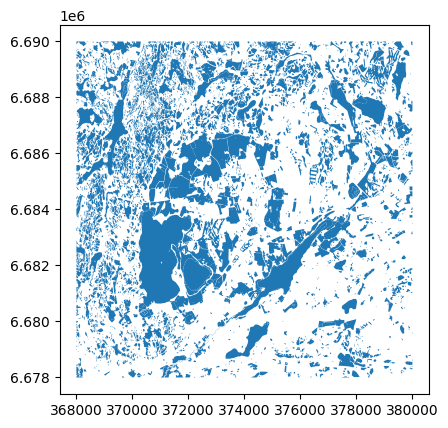

In [47]:
data.plot()

In [48]:
data["geometry"].head()

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry

In [50]:
type(data.geometry[0])

shapely.geometry.polygon.Polygon

In [51]:
print(f"Area: {round(data.at[0, 'geometry'].area)} m².")

Area: 76 m².


In [59]:
for idx, row in data.loc[:5].iterrows():
    area = row.geometry.area
    print(f"Polg {idx} : {area:.3f}")

Polg 0 : 76.027
Polg 1 : 2652.054
Polg 2 : 3185.650
Polg 3 : 13075.165
Polg 4 : 3980.683
Polg 5 : 5544.298


In [60]:
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4299     2651.800270
4300      376.503380
4301      413.942555
4302     3487.927677
4303     1278.963199
Length: 4304, dtype: float64

In [61]:
data["geometry"].area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4299     2651.800270
4300      376.503380
4301      413.942555
4302     3487.927677
4303     1278.963199
Length: 4304, dtype: float64

In [62]:
data["area"] = data.area

In [63]:
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


## Subset

In [64]:
lakes = data[data.CLASS == 36200]

<Axes: >

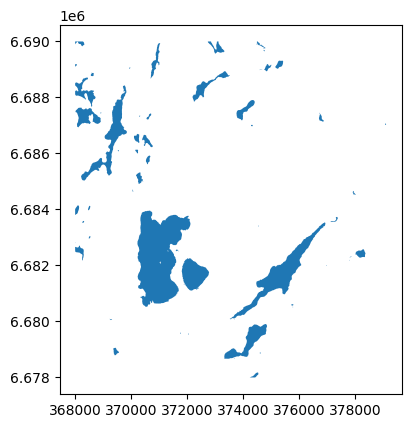

In [65]:
lakes.plot()

In [66]:
lakes.to_file(TOPO_DATABASE_DIR / "lakes.shp")

## Groupby

In [67]:
grouped_data = data.groupby("CLASS")
grouped_data

In [68]:
grouped_data.groups

{32111: [3116], 32112: [3115], 32200: [103, 104], 32417: [3112], 32421: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 32500: [3113, 3114], 32611: [3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201

In [69]:
for key, group in grouped_data:
    print(f"Terrain class {key} has {len(group)} rows.")

Terrain class 32111 has 1 rows.
Terrain class 32112 has 1 rows.
Terrain class 32200 has 2 rows.
Terrain class 32417 has 1 rows.
Terrain class 32421 has 103 rows.
Terrain class 32500 has 2 rows.
Terrain class 32611 has 261 rows.
Terrain class 32612 has 11 rows.
Terrain class 32800 has 81 rows.
Terrain class 32900 has 26 rows.
Terrain class 33000 has 5 rows.
Terrain class 33100 has 117 rows.
Terrain class 34100 has 3003 rows.
Terrain class 34300 has 1 rows.
Terrain class 34700 has 3 rows.
Terrain class 35300 has 134 rows.
Terrain class 35411 has 34 rows.
Terrain class 35412 has 449 rows.
Terrain class 35421 has 5 rows.
Terrain class 36200 has 56 rows.
Terrain class 36313 has 8 rows.


In [70]:
# Iterate over the input data, grouped by CLASS
for key, group in data.groupby("CLASS"):
    # save the group to a new shapefile
    group.to_file(TOPO_DATABASE_DIR / f"terrain_{key}.shp")

In [71]:
area_info = grouped_data.area.sum()

In [72]:
area_info

CLASS
32111    1.833747e+03
32112    2.148168e+03
32200    1.057368e+05
32417    1.026678e+02
32421    6.792797e+05
32500    1.097467e+05
32611    1.314807e+07
32612    1.073431e+05
32800    1.407231e+06
32900    6.158391e+05
33000    6.594647e+05
33100    3.769076e+06
34100    1.236289e+07
34300    1.627079e+03
34700    2.785751e+03
35300    1.382940e+06
35411    3.928004e+05
35412    4.708321e+06
35421    6.786374e+04
36200    9.986966e+06
36313    4.346029e+04
Name: area, dtype: float64

In [73]:
area_info.to_csv(TOPO_DATABASE_DIR / "area_by_class.csv")

## Displaying the CRS of a data set

In [74]:
eu_countries = geopandas.read_file(
    DATA_DIRECTORY / "eu_countries" / "eu_countries_2022.gpkg"
)

In [75]:
eu_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
eu_countries.geometry.head()

0    MULTIPOLYGON (((13.68400 46.43750, 13.51100 46...
1    MULTIPOLYGON (((6.31560 50.49700, 6.40500 50.3...
2    MULTIPOLYGON (((28.49800 43.43410, 28.06020 43...
3    MULTIPOLYGON (((16.94980 48.53580, 16.85110 48...
4    MULTIPOLYGON (((32.94170 34.64180, 32.55900 34...
Name: geometry, dtype: geometry

In [78]:
eu_countries_epsg3035 = eu_countries.to_crs("EPSG:3035")

In [79]:
eu_countries_epsg3035.geometry.head()

0    MULTIPOLYGON (((4604288.477 2598607.470, 45914...
1    MULTIPOLYGON (((4059689.242 3049361.180, 40650...
2    MULTIPOLYGON (((5805367.757 2442801.252, 57739...
3    MULTIPOLYGON (((4833567.363 2848881.974, 48272...
4    MULTIPOLYGON (((6413299.362 1602181.345, 63782...
Name: geometry, dtype: geometry

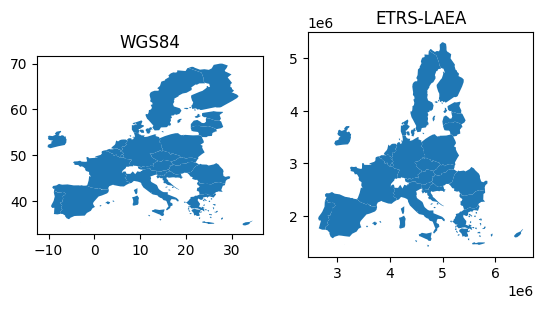

In [80]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)

eu_countries.plot(ax=ax1)
ax1.set_title("WGS84")
ax1.set_aspect(1)

eu_countries_epsg3035.plot(ax=ax2)
ax2.set_title("ETRS-LAEA")
ax2.set_aspect(1)

In [81]:
eu_countries_epsg3035.to_file(
    DATA_DIRECTORY / "eu_countries" / "eu_countries_epsg3035.gpkg"
)

## Projection

In [82]:
import pyproj

In [83]:
crs = pyproj.CRS(eu_countries.crs)

In [84]:
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
print(f"CRS as a proj4 string: {crs.to_proj4()}\n")

print(f"CRS in WKT format: {crs.to_wkt()}\n")

print(f"EPSG code of the CRS: {crs.to_epsg()}\n")

CRS as a proj4 string: +proj=longlat +datum=WGS84 +no_defs +type=crs

CRS in WKT format: GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]

EPSG code of the CRS: 4326



/Users/shuaiyizhang/Develop/AutoGIS/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [86]:
world_countries = geopandas.read_file(
    DATA_DIRECTORY / "world_countries" / "ne_110m_admin_0_countries.zip"
)

Text(0.5, 1.0, 'WGS 84')

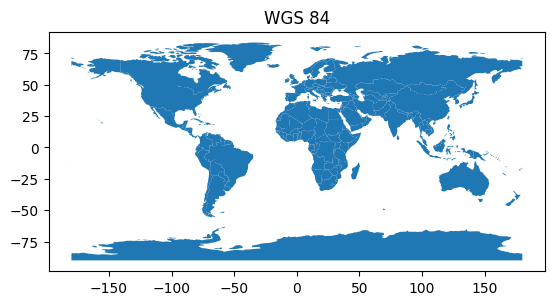

In [88]:
world_countries.plot()
plt.title(world_countries.crs.name)

(-22041259.17706817,
 22041259.177068174,
 -255577115.13568556,
 31488437.087057084)

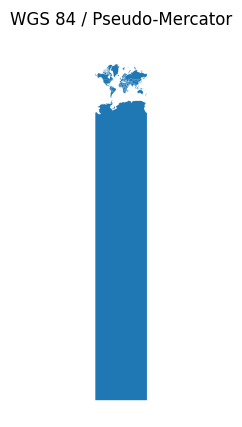

In [89]:
# web mercator
world_countries_EPSG3857 = world_countries.to_crs("EPSG:3857")

world_countries_EPSG3857.plot()
plt.title(world_countries_EPSG3857.crs.name)
plt.axis("off")

(-18321736.696081996,
 18321736.696081996,
 -9302420.503183275,
 9217598.414473996)

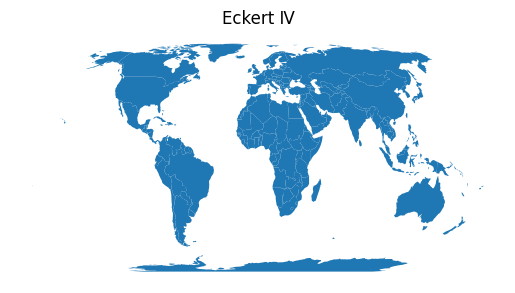

In [90]:
# Eckert-IV (https://spatialreference.org/ref/esri/54012/)
ECKERT_IV = "+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"

world_countries_eckert_iv = world_countries.to_crs(ECKERT_IV)
world_countries_eckert_iv.plot()
plt.title("Eckert Ⅳ")
plt.axis("off")